In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("customer_churn.csv")
print("Shape:", data.shape)
data.head()

Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
print("Missing")
data.isna().sum()

Missing


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [4]:
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors="coerce")
data["TotalCharges"].isna().sum()

np.int64(11)

In [5]:
data["TotalCharges"].fillna(data["TotalCharges"].median(), inplace=True)
data = data.drop(columns=["customerID"])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


/tmp/ipython-input-2829525545.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["TotalCharges"].fillna(data["TotalCharges"].median(), inplace=True)


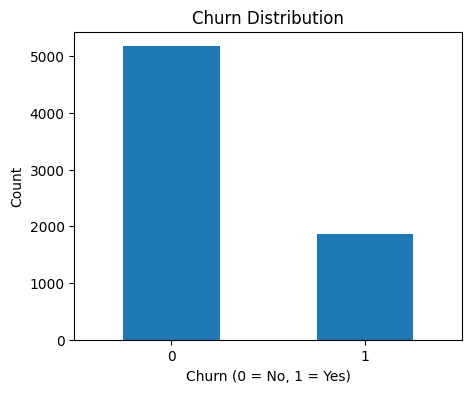

In [6]:
data["Churn"] = data["Churn"].map({"Yes": 1, "No": 0})

plt.figure(figsize=(5, 4))
data["Churn"].value_counts().plot(kind="bar")
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

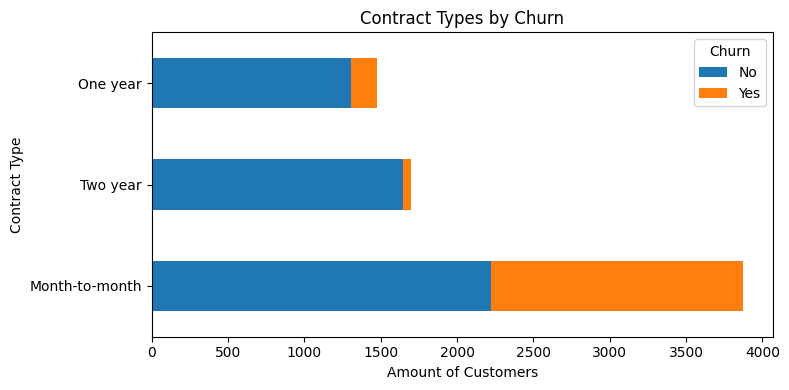

In [7]:
plt.figure(figsize=(8, 4))

contract_order = ["Month-to-month", "Two year", "One year"]

contract_split = pd.crosstab(data["Contract"],data["Churn"]).reindex(contract_order)
contract_split.plot(kind="barh", stacked=True, ax=plt.gca())

plt.title("Contract Types by Churn")
plt.xlabel("Amount of Customers")
plt.ylabel("Contract Type")
plt.legend(title="Churn", labels=["No", "Yes"])
plt.tight_layout()
plt.show()


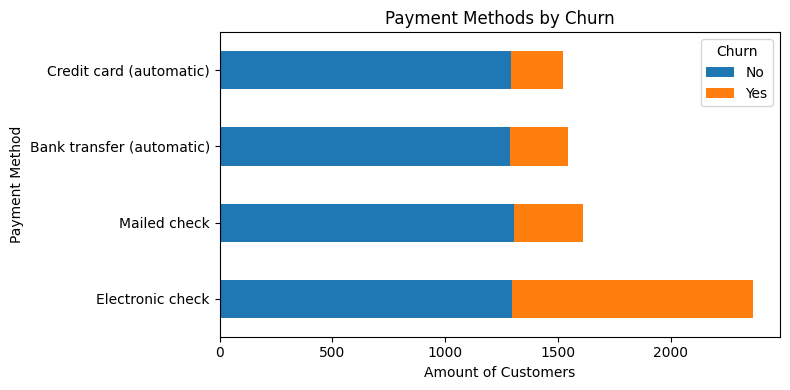

In [8]:
plt.figure(figsize=(8, 4))

paymentmethod_split = pd.crosstab( data["PaymentMethod"], data["Churn"])
paymentmethod_split_sorted = paymentmethod_split.sort_values(by=1,ascending=False)

paymentmethod_split_sorted.plot(kind="barh", stacked=True, ax=plt.gca())

plt.title("Payment Methods by Churn")
plt.ylabel("Payment Method")
plt.xlabel("Amount of Customers")
plt.legend(title="Churn", labels=["No", "Yes"])
plt.tight_layout()
plt.show()

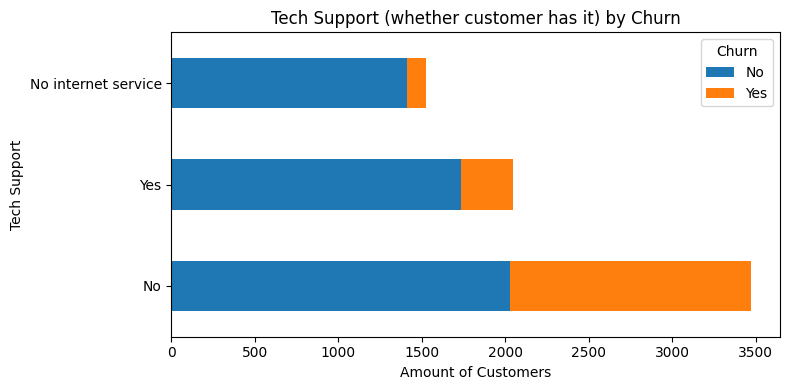

In [9]:
plt.figure(figsize=(8, 4))

techsupport_split = pd.crosstab( data["TechSupport"], data["Churn"])
techsupport_split_sorted = techsupport_split.sort_values(by=1,ascending=False)

techsupport_split_sorted.plot( kind="barh", stacked=True, ax=plt.gca())

plt.title("Tech Support (whether customer has it) by Churn")
plt.ylabel("Tech Support")
plt.xlabel("Amount of Customers")
plt.legend(title="Churn", labels=["No", "Yes"])
plt.tight_layout()
plt.show()

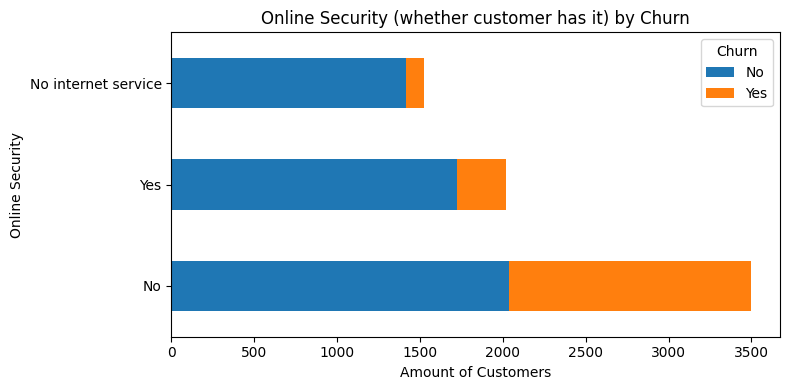

In [10]:
plt.figure(figsize=(8, 4))

onlinesecurity_split = pd.crosstab(data["OnlineSecurity"], data["Churn"] )
onlinesecurity_split_sorted = onlinesecurity_split.sort_values(by=1,ascending=False)

onlinesecurity_split_sorted.plot(kind="barh", stacked=True, ax=plt.gca())

plt.title("Online Security (whether customer has it) by Churn")
plt.ylabel("Online Security")
plt.xlabel("Amount of Customers")
plt.legend(title="Churn", labels=["No", "Yes"])
plt.tight_layout()
plt.show()

<Figure size 600x400 with 0 Axes>

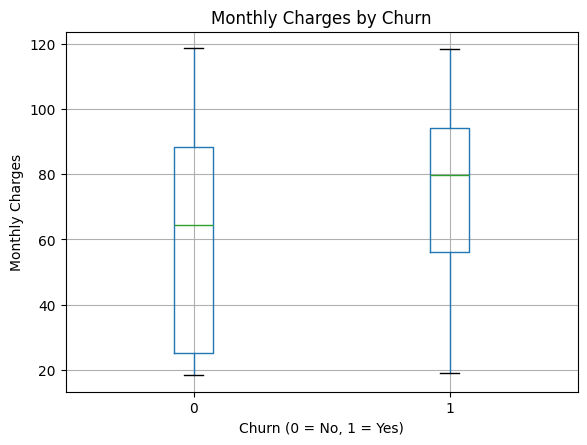

In [11]:
plt.figure(figsize=(6, 4))

data.boxplot(column="MonthlyCharges", by="Churn")

plt.title("Monthly Charges by Churn")
plt.suptitle("")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Monthly Charges")
plt.show()

<Figure size 600x400 with 0 Axes>

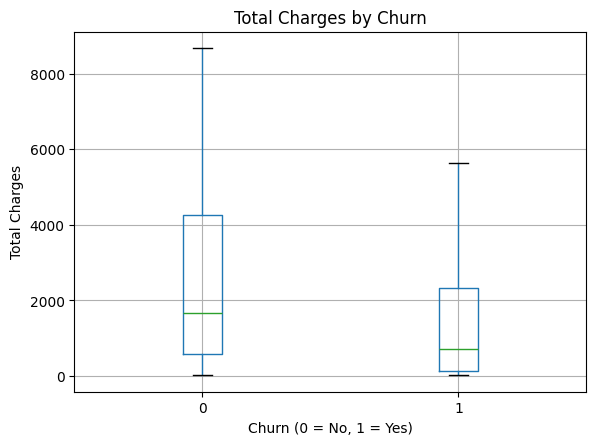

In [12]:
plt.figure(figsize=(6, 4))

data.boxplot(column="TotalCharges", by="Churn", showfliers=False)

plt.title("Total Charges by Churn")
plt.suptitle("")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Total Charges")
plt.show()

In [13]:
data["tenure_by_year"] = pd.cut(
    data["tenure"],
    bins=[0, 12, 24, 36, 48, 60, 72],
    labels=["1st Year", "2nd Year", "3rd Year", "4th Year", "5th Year", "6th Year"])

tenure_churn = data.groupby("tenure_by_year")["Churn"].mean()

/tmp/ipython-input-591711638.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn = data.groupby("tenure_by_year")["Churn"].mean()


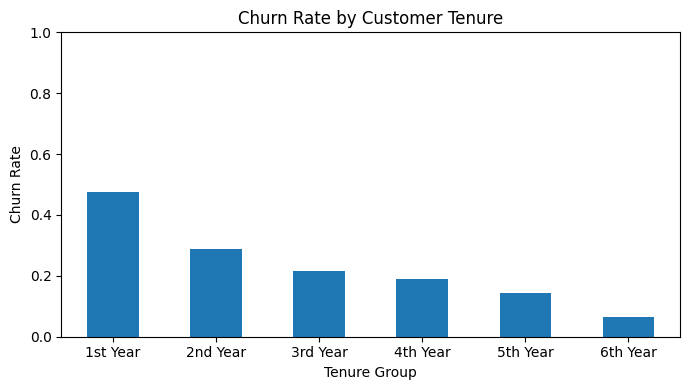

In [14]:
plt.figure(figsize=(7, 4))

tenure_churn.plot(kind="bar")

plt.title("Churn Rate by Customer Tenure")
plt.xlabel("Tenure Group")
plt.ylabel("Churn Rate")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [15]:
data["new_customer"] = (data["tenure"] <= 12).astype(int)

data["high_monthly_charge"] = (data["MonthlyCharges"] >= (data["MonthlyCharges"].quantile(0.75))).astype(int)

data["multiple_support"] = (
    (data["OnlineSecurity"] == "Yes").astype(int) +
    (data["TechSupport"] == "Yes").astype(int) +
    (data["DeviceProtection"] == "Yes").astype(int))

data["streaming_bundle"] = (
    (data["StreamingTV"] == "Yes") &
    (data["StreamingMovies"] == "Yes")).astype(int)

data.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_by_year,new_customer,high_monthly_charge,multiple_support,streaming_bundle
659,Male,0,Yes,No,37,Yes,No,No,No internet service,No internet service,...,No,Bank transfer (automatic),20.35,697.65,0,4th Year,0,0,0,0
5750,Female,1,Yes,No,13,Yes,No,Fiber optic,No,No,...,Yes,Electronic check,70.15,916.75,1,2nd Year,0,0,0,0
2974,Male,0,No,No,28,Yes,Yes,Fiber optic,Yes,Yes,...,Yes,Credit card (automatic),94.50,2659.40,1,3rd Year,0,1,1,0
3657,Female,0,Yes,Yes,37,Yes,Yes,No,No internet service,No internet service,...,Yes,Bank transfer (automatic),24.10,861.85,0,4th Year,0,0,0,0
3506,Male,0,No,No,19,Yes,Yes,Fiber optic,Yes,No,...,Yes,Electronic check,84.75,1651.95,0,2nd Year,0,0,2,0


In [16]:
X = data.drop(columns=["Churn"])
y = data["Churn"]


In [17]:
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()

print("Numeric features:")
print(numeric_features)

print("\nCategorical features:")
print(categorical_features)

Numeric features:
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'new_customer', 'high_monthly_charge', 'multiple_support', 'streaming_bundle']

Categorical features:
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [19]:

numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])

categorical_transformer = Pipeline(steps=[("onehot", OneHotEncoder(handle_unknown="ignore", drop="first"))])

preprocessor = ColumnTransformer(
    transformers=[("num", numeric_transformer, numeric_features),
                  ("cat", categorical_transformer, categorical_features)])

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17, stratify=y)

In [21]:
X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

In [22]:
from google.colab import files

files.download("X_train.csv")
files.download("X_test.csv")
files.download("y_train.csv")
files.download("y_test.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>